In [30]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pandas import plotting
from sklearn import preprocessing, decomposition
from sklearn.svm import LinearSVC, SVC
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import scipy.stats
import mglearn
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing#機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
import csv

1 月 [0.94829043 0.04908808]
[[-0.08116101 -0.00287417  0.03246152  0.99615981  0.00382708  0.00136689]
 [-0.99608609 -0.00825979 -0.03444718 -0.08004367 -0.00691527  0.01014184]]


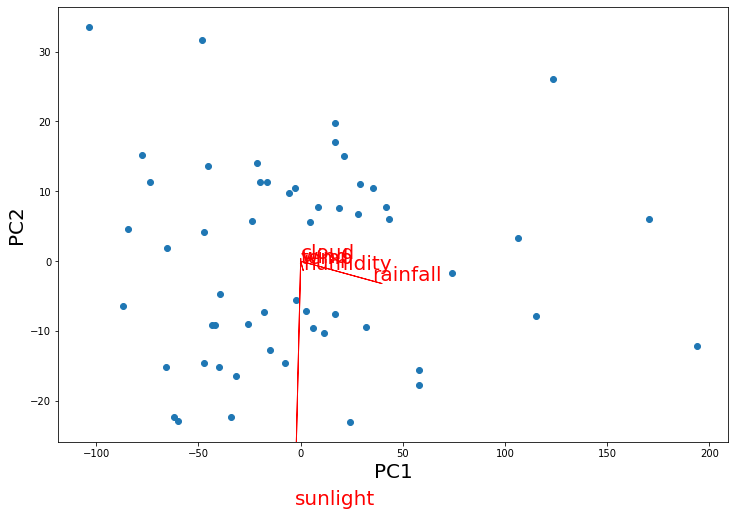

正答率 =  0.5294117647058824


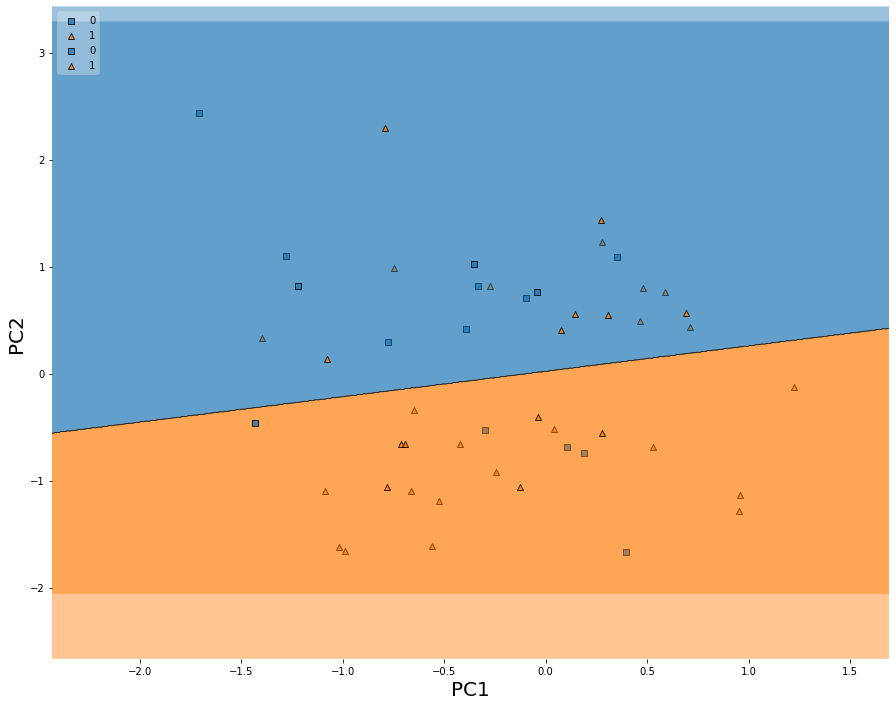

2 月 [0.84130245 0.15144832]
[[-1.92273426e-01 -7.70011098e-03  2.17657665e-02  9.81064872e-01
   7.15118335e-04  3.01596160e-03]
 [-9.81046587e-01 -3.24485687e-03 -2.17769227e-02 -1.91845126e-01
  -9.48948978e-03  1.29702531e-02]]


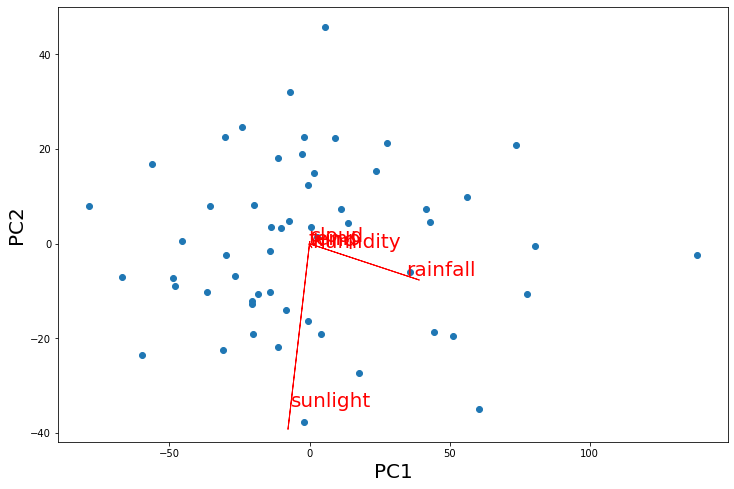

正答率 =  0.35294117647058826


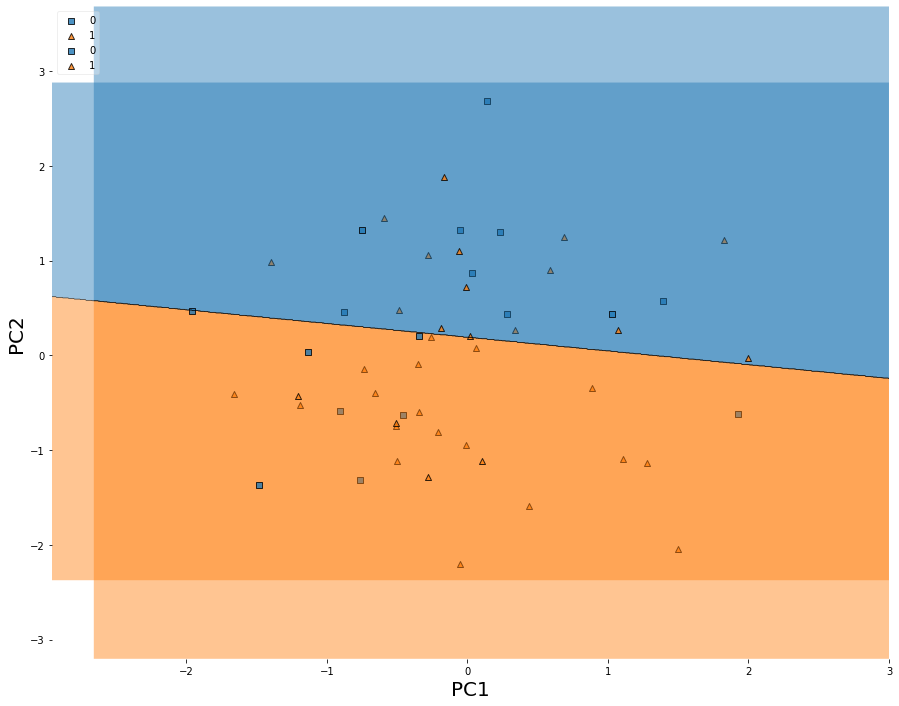

3 月 [0.72657102 0.26611703]
[[-4.68890250e-01  5.21398102e-03  2.73968894e-02  8.82760125e-01
  -1.83379366e-03  9.76510412e-03]
 [ 8.82780368e-01  2.07143018e-04  4.01740889e-02  4.67822499e-01
   2.94800788e-03 -1.47729539e-02]]


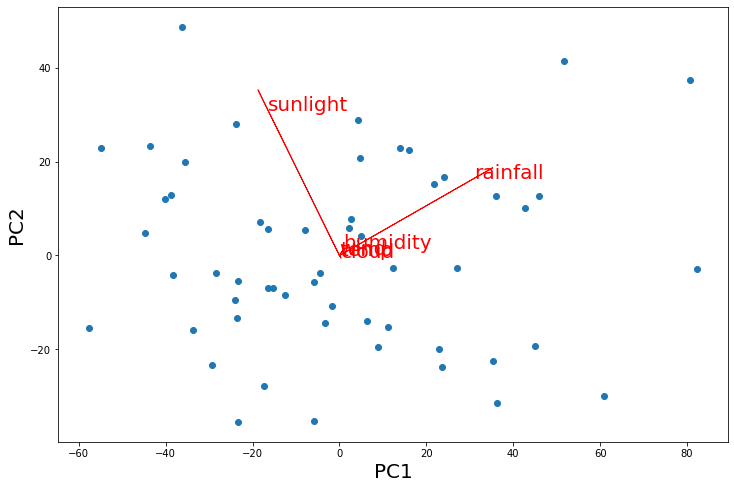

正答率 =  0.5882352941176471


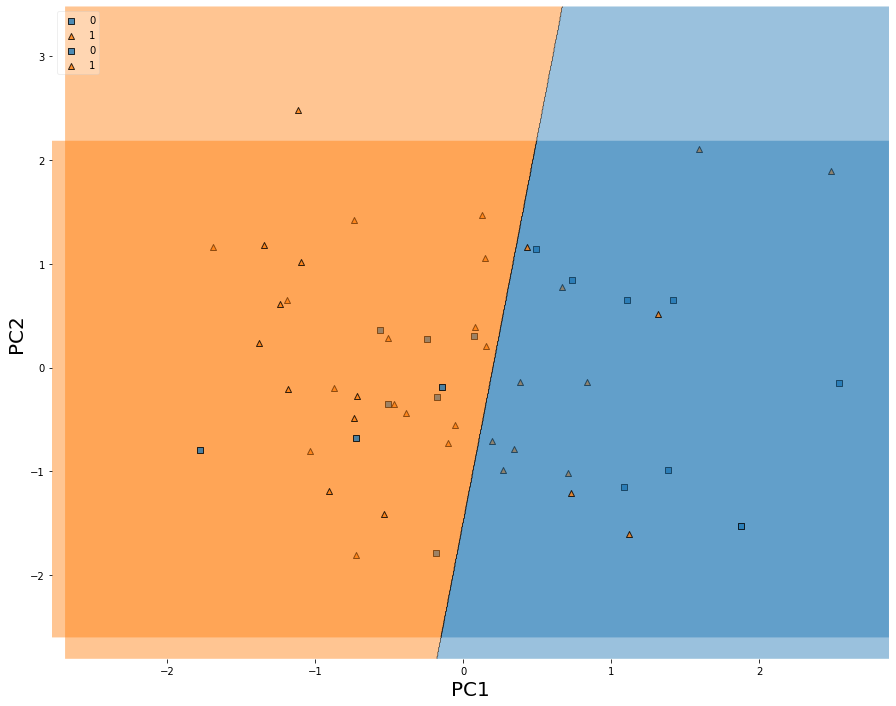

4 月 [0.70799213 0.28521762]
[[-0.51936983  0.00360818  0.03934541  0.85360452 -0.00206577  0.00699676]
 [-0.85436391 -0.00513168 -0.01413164 -0.51927547 -0.00221581  0.0135773 ]]


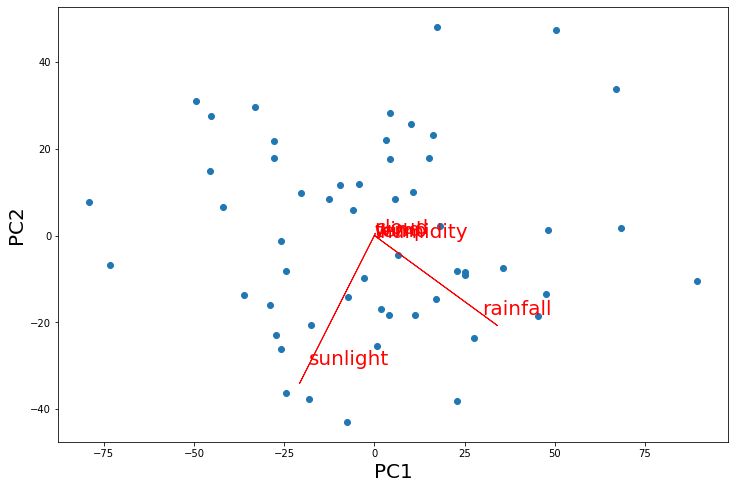

正答率 =  0.7058823529411765


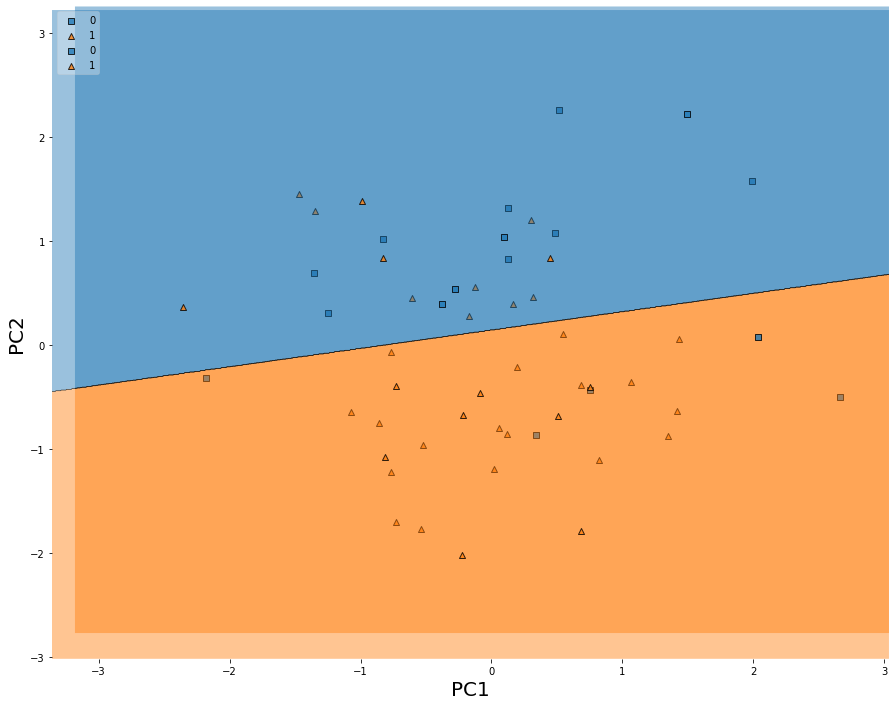

5 月 [0.7186155  0.27871064]
[[-3.08552993e-01 -1.69194948e-03  2.14572487e-02  9.50931401e-01
  -1.44319362e-03  7.69168798e-03]
 [ 9.51047636e-01  1.80801193e-03 -7.92926619e-05  3.08712402e-01
   1.77382276e-03 -1.40934600e-02]]


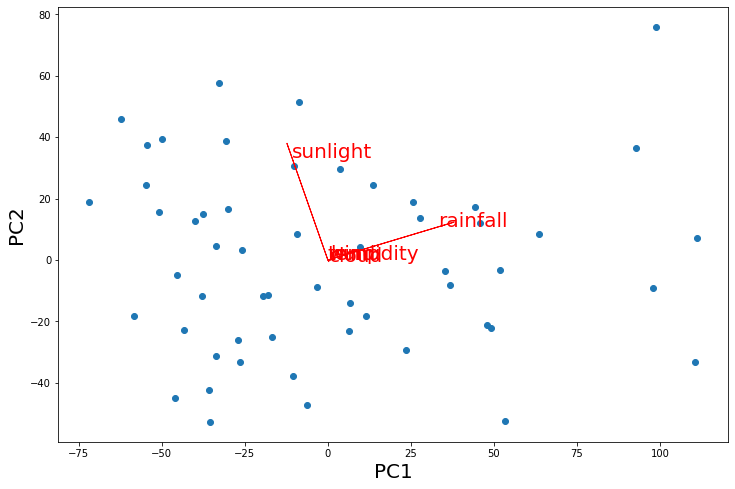

正答率 =  0.8823529411764706


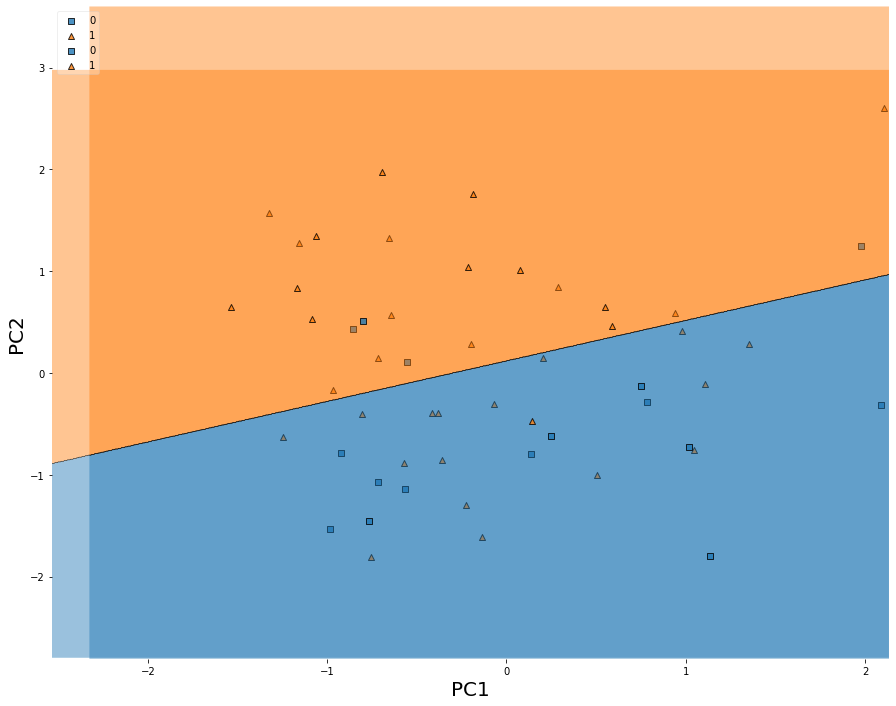

6 月 [0.83519992 0.16334337]
[[-1.96475172e-01  1.51064162e-03  2.59057752e-02  9.80159563e-01
  -1.59033523e-03  2.96948651e-03]
 [-9.79970262e-01 -3.72200610e-03  2.37395978e-02 -1.97105031e-01
  -6.60890704e-05  1.51811018e-02]]


In [ ]:
# データの読み込み
df_sunlight = pd.read_csv('sunlight_hours.csv', index_col=0)
df_temp = pd.read_csv('NiigataKishou_temp.csv', index_col = 0)
df_humidity = pd.read_csv('arrange_humidity.csv', index_col = 0)
df_yield = pd.read_csv('niigata_rice_10a.csv', index_col = 0)
df_rainfall = pd.read_csv("rainfall.csv", index_col = 0)
df_wind = pd.read_csv("wind.csv", index_col = 0)
df_cloud = pd.read_csv("cloud.csv", index_col = 0)



def analysis(month):
    
    # 結果の情報
    result = []
    
    # dataframeから配列に変換
    sunlight = df_sunlight[month].values
    temp = df_temp[month].values
    humidity = df_humidity[month].values
    rainfall = df_rainfall[month].values
    wind = df_wind[month].values
    cloud = df_cloud[month].values
    rice_yield = np.array(df_yield['Yield/10a(t)'].values)

    # 6つのデータの配列を55x6のnumpy2次元配列に変換
    data = np.empty([0, 6])
    for i in range(len(sunlight)):
        temp_array = np.array([sunlight[i], temp[i], humidity[i], rainfall[i], wind[i], cloud[i]])
        data = np.append(data, np.array([temp_array]), axis = 0)


    # クラスラベルを生成. 1を豊作に.
    y_judge = np.empty([0,1])
    for j in rice_yield:
        if j >= 480:
            y_judge = np.append(y_judge, 1)
        else:
            y_judge = np.append(y_judge, 0)

    y_judge = np.array(y_judge, dtype=int)


    # PCA 55x6の気候データを55x2の気候データに圧縮
    pca = PCA(n_components=2)
    pca.fit(data)
    # 各主成分によってどの程度カバー出来ているかの割合(第一主成分，第二主成分)
    print(month,"月", pca.explained_variance_ratio_)
    print(pca.components_)

    # 次元削減をdataに適用し, pca_pointに渡す.
    pca_point = pca.transform(data) # pca_pointは55x1

    # 第一主成分と第二主成分の配列
    pc0 = pca.components_[0]
    pc1 = pca.components_[1]
    
    # ベクトルをプロットするときに使う各成分の名前
    feature_names = ["sunlight", "temp", "humidity", "rainfall", "wind", "cloud"]
    
    
    # 画像の大きさは先に決める
    fig2 = plt.figure(figsize=(12, 8))
    
    # ベクトルをプロット
    for i in range(pc0.shape[0]):
        plt.arrow(0, 0, pc0[i]*40, pc1[i]*40, color='r')
        plt.text(pc0[i]*35, pc1[i]*35, feature_names[i], color='r', fontsize = 20)
    
    
    # 気候データの２次元のプロット
    plt.xlabel("PC1", fontsize = 20)
    plt.ylabel("PC2",fontsize = 20)
    plt.scatter(pca_point[:, 0], pca_point[:, 1] )
    plt.savefig("scatter/{}_scatter.png".format(month))
    plt.show()

    # SVM
    # pca_pointを標準化
    sc=preprocessing.StandardScaler()
    sc.fit(pca_point)
    # 標準化をpca_pointに適用する．
    pca_point=sc.transform(pca_point)



    # 55 x 2：PC1, PC2の配列を生成
    X_data = np.empty([0, 2])
    for i in range(len(pca_point)):
        temp_array = np.array([pca_point[i][0], pca_point[i][1]])
        X_data = np.append(X_data, np.array([temp_array]), axis = 0)


    # trainデータとtestデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_judge, test_size=0.3, random_state=None )

    # SVM LinearSVC trainデータで訓練
    clf_result=LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0)#loss='squared_hinge' #loss="hinge", loss="log"
    clf_result.fit(X_train, y_train)

    # 正答率を求める
    pre=clf_result.predict(X_test)
    ac_score=metrics.accuracy_score(y_test,pre)
    print("正答率 = ",ac_score)
    
    
    # SVMの分析結果をplotする
    X_train_plot=np.vstack(X_train)
    y_train_plot=np.hstack(y_train)
    X_test_plot=np.vstack(X_test)
    y_test_plot=np.hstack(y_test)
    fig = plt.figure(figsize=(15, 12))
    plt.xlabel("PC1", fontsize = 20)
    plt.ylabel("PC2",fontsize = 20)
    fig1 = plot_decision_regions(X_train_plot, y_train_plot, clf=clf_result, res=(2, )) #学習データをプロット
    fig2 = plot_decision_regions(X_test_plot, y_test_plot, clf=clf_result, res=(2, ), legend=2) #テストデータをプロット
    plt.savefig("SVM_plot/{}_SVM.png".format(month))
    plt.show()
    
    
    result.append(int(month))
    result.append(pca.explained_variance_ratio_[0])
    result.append(pca.explained_variance_ratio_[1])
    result.append(ac_score)
    #print(result)
    return result

def main():
    m_tag = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    result = []
    header = ["month", "PC1", "PC2", "SVM_score"]
    for i in m_tag:
        result.append(analysis(i))
    print(result)
    with open('result.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        for row in result:
            writer.writerow(row)
    


if __name__ == "__main__":
    main()

